# TP n°3 : orbite de transfert

Nous allons nous intéresser dans cette séance au mouvements des satellites autour de la Terre. Lorsqu’on se place dans un référentiel de centre $O$, centre de la Terre, la force de gravitation qui s’exerce sur le satellite (de la part de la Terre) s’´ecrit ici :

<div align="center"> $\vec{F} = -G \frac{M . m}{d^2}\vec{u}$ </div>

où
- $G$ est la constante de la gravitation universelle
- $m$ est la masse du satellite
- $M$ est la masse de la Terre
- $d$ est la distance entre le centre de la Terre et le satellite
- $\vec{u}$ est un vecteur unitaire dirigé selon la direction $\vec{OM}$, avec $M$ la position du satellite

On se place ici dans un référentiel cartésien $(Oxyz)$ centré sur le centre de la Terre. On supposera que la Terre est fixe dans ce référentiel.

<img src="images/Terre.png" alt="drawing" width="400"/>



Nous avons montré que :
<div align="center"> $a_x = -G\frac{Mx}{d^3}$ </div>
<div align="center"> $a_y = -G\frac{My}{d^3}$ </div>

avec 

- $G$ est la constante de la gravitation universelle : $6,674 3015 \times 10^{−11} m^3 kg^{−1} s^{−2}$
- $M$ est la masse de la Terre : $5,972 \times 10^{24} kg$





In [46]:
import numpy as np

# constantes
G = 6.6743015e-20 # km3kg-1s-1
M = 5.972e24 # kg
R = 6500 # km
d = 20000 # km

v0 = np.sqrt(G*M/d)
T = 2*np.pi*np.sqrt(d/(G*M))*d
print("Vitesse initale (orbite circulaire)",v0)
print("Periode initiale (orbite circulaire)",T)

# temps
t = 0 # en s
tmax = 500000 # en s
dt = 1 # pas de temps en s
lt = []

# coord y
y = d # en km
vy = 0 # en km.s-1
ay = 0 # en km.s-2
ly = []

# coord x
x = 0 # en km
vx = v0 # en km.s-1
ax = 0 # en km.s-2
lx = []


d = np.sqrt(x*x+y*y)
ld = []

while (t<tmax) and (d > R) : 
    t = t + dt
    lt.append(t)
    
    d = np.sqrt(x*x+y*y)
    
    ax = -G * M * x / d**3
    vx = vx + ax * dt
    x = x + vx * dt
    
    ay = -G * M * y / d**3
    vy = vy + ay * dt
    y = y + vy * dt
    
    lx.append(x)
    ly.append(y)
    ld.append(d)




    

Vitesse initale (orbite circulaire) 4.464242856185134
Periode initiale (orbite circulaire) 28148.940412031297


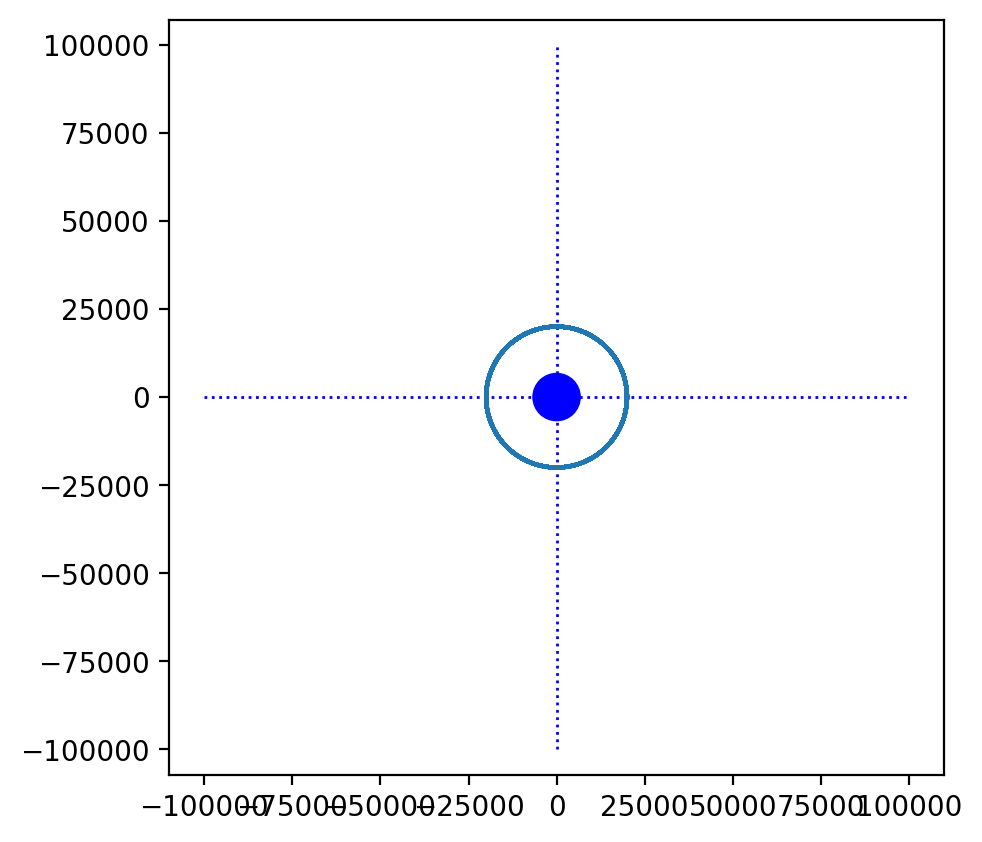

In [47]:
import matplotlib.pyplot as plt

## AFFICHAGE DES RESULTATS
xmax = 100000
ymax = 100000
xmin = -100000
ymin = -100000

# Ici on crée un graphe en précisant les limites des axes
fig, ax = plt.subplots(figsize=(5, 5), dpi=200) 
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axis('equal') # Permet de faire que l'echelle des x et des z soient les mêmes


# Ajout de lignes pointillées horizontales et verticales
plt.plot([0, 0], [ymin,ymax], linestyle=':',linewidth=1,color='b')
plt.plot([xmin,xmax],[0,0],   linestyle=':',linewidth=1,color='b')

# Ajout d'un cercle qui représente la Terre
Terre = plt.Circle((0, 0), 6500, color='b')
#Lune = plt.Circle((385000,0 ), 1500, color='r')


ax.add_artist(Terre)
#ax.add_artist(Lune)



# AJOUTER ICI LA TRAJECTOIRE DE VOTRE SATELLITE
plt.plot(lx,ly)


# Generation du dessin
plt.show()

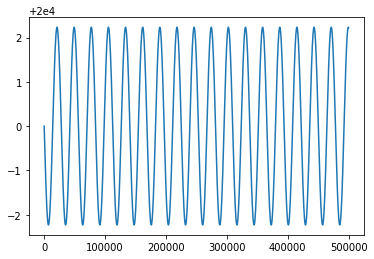

In [48]:
plt.plot(lt,ld)
plt.show()
